In [1]:
using Plots
using CSV
using DataFrames
using StatsBase

## Sim Data  -> Low Variability

In [2]:
sim_data_path = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/sim_data/05_30_pso100_50_2.csv"
sim_data = DataFrame(CSV.File(sim_data_path; drop=[1]))
# sim_data[!, "x1"]

,x1,x2,x3,x4,x5,x6,x7,x8,x9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,5.10794e10,1.0e-6,5.27417e10,1.0e-6,1.0e-6,1.0e-6,1.0e-6,1.0e-6,1.0e-6
2,4.59436e10,1.0e-6,4.77599e10,1.0e-6,1.0e-6,1.0e-6,1.0e-6,1.0e-6,1.0e-6
3,5.05818e10,1.0e-6,5.30574e10,1.0e-6,1.0e-6,1.0e-6,1.0e-6,1.0e-6,1.0e-6
4,4.93675e10,1.0e-6,5.10811e10,1.0e-6,1.0e-6,1.0e-6,1.0e-6,1.0e-6,1.0e-6
5,5.10794e10,1.0e-6,5.27417e10,1.0e-6,1.0e-6,1.0e-6,1.0e-6,1.0e-6,1.0e-6
6,3.71355e10,1.0e-6,3.80784e10,1.0e-6,1.0e-6,1.0e-6,1.0e-6,1.0e-6,1.0e-6
7,3.75848e10,1.0e-6,3.74256e10,1.0e-6,1.0e-6,1.0e-6,1.0e-6,1.0e-6,1.0e-6
8,3.79228e10,1.0e-6,3.82494e10,1.0e-6,1.0e-6,1.0e-6,1.0e-6,1.0e-6,1.0e-6
9,3.67975e10,1.0e-6,3.72546e10,1.0e-6,1.0e-6,1.0e-6,1.0e-6,1.0e-6,1.0e-6


## History Data

In [3]:
hist_data_path = "/Users/julietnwagwuume-ezeoke/My Drive/CS361_Optim/_fp_cs361/hist_data/elect.csv"
hist_data = DataFrame(CSV.File(hist_data_path; drop=[1]))

# hist_data[!, "0"]

,0
,Float64
1,4.96949e10
2,4.85494e10
3,4.47668e10
4,4.49106e10
5,5.42743e10
6,4.16979e10
7,4.09721e10
8,4.14693e10
9,4.1515e10


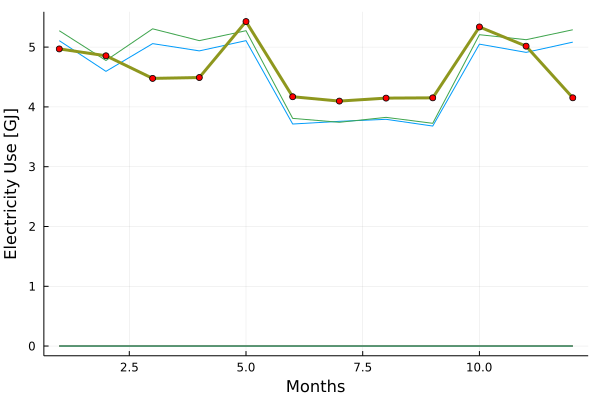

In [16]:
plot()
for i = 1:size(sim_data)[2]
    plot!(sim_data[!, "x$i"]./10e9, leg=false)
end

plot!(hist_data[!, "0"]./10e9, linewidth=3, linestyle = :solid,
markershape= :circle, markercolor= :red, markersize=4,
label="historical", xlabel="Months", ylabel="Electricity Use [GJ]")


# RMSE

In [12]:
Y = Matrix(sim_data)
h = Matrix(hist_data)

12×1 Matrix{Float64}:
 4.969488797635679e10
 4.854941092244163e10
 4.4766776221326004e10
 4.491060873281641e10
 5.4274283592166794e10
 4.169789752583157e10
 4.0972087017759636e10
 4.14692987493636e10
 4.15149885016308e10
 5.337295014723481e10
 5.0157244633798836e10
 4.1521494332559616e10

In [13]:
hgj = h./10e9 # GJ 

12×1 Matrix{Float64}:
 4.9694887976356785
 4.854941092244163
 4.4766776221326
 4.491060873281641
 5.427428359216679
 4.169789752583157
 4.097208701775964
 4.14692987493636
 4.15149885016308
 5.337295014723481
 5.015724463379883
 4.152149433255961

In [14]:
Ygj = Y./10e9


12×9 Matrix{Float64}:
 5.10794  1.0e-16  5.27417  1.0e-16  …  1.0e-16  1.0e-16  1.0e-16  1.0e-16
 4.59436  1.0e-16  4.77599  1.0e-16     1.0e-16  1.0e-16  1.0e-16  1.0e-16
 5.05818  1.0e-16  5.30574  1.0e-16     1.0e-16  1.0e-16  1.0e-16  1.0e-16
 4.93675  1.0e-16  5.10811  1.0e-16     1.0e-16  1.0e-16  1.0e-16  1.0e-16
 5.10794  1.0e-16  5.27417  1.0e-16     1.0e-16  1.0e-16  1.0e-16  1.0e-16
 3.71355  1.0e-16  3.80784  1.0e-16  …  1.0e-16  1.0e-16  1.0e-16  1.0e-16
 3.75848  1.0e-16  3.74256  1.0e-16     1.0e-16  1.0e-16  1.0e-16  1.0e-16
 3.79228  1.0e-16  3.82493  1.0e-16     1.0e-16  1.0e-16  1.0e-16  1.0e-16
 3.67975  1.0e-16  3.72546  1.0e-16     1.0e-16  1.0e-16  1.0e-16  1.0e-16
 5.04926  1.0e-16  5.20758  1.0e-16     1.0e-16  1.0e-16  1.0e-16  1.0e-16
 4.91186  1.0e-16  5.1239   1.0e-16  …  1.0e-16  1.0e-16  1.0e-16  1.0e-16
 5.08306  1.0e-16  5.28996  1.0e-16     1.0e-16  1.0e-16  1.0e-16  1.0e-16

In [15]:
ygj = []
for i=1:size(Ygj,2)
    append!(ygj, rmsd(Ygj[:, i], hgj, normalize=false))
end
ygj

9-element Vector{Any}:
 0.44323477972002817
 4.6316331848988
 0.5046259018329794
 4.6316331848988
 4.6316331848988
 4.6316331848988
 4.6316331848988
 4.6316331848988
 4.6316331848988

# Plot in GJ

In [4]:

for i = 1:10
    plot!(sim_data[!, "x$i"]./10e9, leg=false)
end

plot!(hist_data[!, "0"]./10e9, linewidth=3, linestyle = :solid,
markershape= :circle, markercolor= :red, markersize=4,
label="historical", title="Simulations vs Historical Electricity Use", xlabel="Months", ylabel="Electricity Use [GJ]")



ArgumentError: ArgumentError: column name :x10 not found in the data frame; existing most similar names are: :x1